# Processing Simulation Data
This notebook is to be used as a local tool to process simulation data that is generated after running ```run_sim/sh``` in the repository. This allows all simulation information to be aggregated nicely and averaged. PANDAS is the primary tool for processing the data.

In [73]:
#imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import math
from IPython.display import display
from matplotlib.colors import LogNorm
from matplotlib import cm
import os

%matplotlib inline

In [74]:
#get the data files
f_mean = []
f_mes = []
f_ei = []
path= '/home/vpreston/Documents/IPP/informative-path-planning/experiments'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'metric' in name and 'mean' in root:
            f_mean.append(root + "/" + name)
        elif 'metric' in name and 'exp_improve' in root:
            f_ei.append(root + "/" + name)
        elif 'metric' in name and 'mes' in root:
            f_mes.append(root + "/" + name)

In [75]:
# variables for making dataframes
l = ['time', 'info_gain','aqu_fun', 'MSE', 'hotspot_error','max_loc_error', 'max_val_error', 
                    'simple_regret', 'sample_regret_loc', 'sample_regret_val', 'regret', 'info_regret',
                    'current_highest_obs', 'current_highest_obs_loc_x', 'current_highest_obs_loc_y',
                    'robot_loc_x', 'robot_loc_y', 'robot_loc_a', 'star_obs_0', 'star_obs_loc_x_0',
                    'star_obs_loc_y_0', 'star_obs_1', 'star_obs_loc_x_1', 'star_obs_loc_y_1']

In [76]:
#All UCB data
d = f_mean[0]
mean_data = pd.read_table(d, delimiter = " ", header=None)
mean_data = mean_data.T
mean_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mean_data = mean_data.append(temp_data)

mean_data.head(5)
print len(mean_data)

3325


In [77]:
#All MES data
d = f_mes[0]
mes_data = pd.read_table(d, delimiter = " ", header=None)
mes_data = mes_data.T
mes_data.columns = l

for m in f_mes[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mes_data = mes_data.append(temp_data)

mes_data.head(5)
print len(mes_data)

3325


In [78]:
#All EI data
d = f_ei[0]
ei_data = pd.read_table(d, delimiter = " ", header=None)
ei_data = ei_data.T
ei_data.columns = l

for m in f_ei[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    ei_data = ei_data.append(temp_data)

ei_data.head(5)
print len(ei_data)

3325


## Getting Averages at the End of Time
First, let's go ahead and get a snapshot of the last frame for all of these simulations

In [79]:
mean_end = mean_data[mean_data.time == 174]
mes_end = mes_data[mes_data.time == 174]
ei_end = ei_data[ei_data.time == 174]

for e in l:
    print '-------------'
    print str(e)
    print 'MEAN:    ' + str(mean_end[e].mean())
    print 'MES :    ' + str(mes_end[e].mean())
    print 'EI  :    ' + str(ei_end[e].mean())

-------------
time
MEAN:    174.0
MES :    174.0
EI  :    174.0
-------------
info_gain
MEAN:    22802.0843046
MES :    21712.5414852
EI  :    17431.0382326
-------------
aqu_fun
MEAN:    348528.664553
MES :    455.220694362
EI  :    56830.3412734
-------------
MSE
MEAN:    0.544991048711
MES :    0.701390341014
EI  :    5.55468520305
-------------
hotspot_error
MEAN:    0.733459822195
MES :    1.15451642702
EI  :    7.52062968187
-------------
max_loc_error
MEAN:    1.49897613682
MES :    1.26491043611
EI  :    1.14489978429
-------------
max_val_error
MEAN:    0.723198105172
MES :    0.725726122815
EI  :    0.758626058051
-------------
simple_regret
MEAN:    3.37217637778
MES :    1.15679357902
EI  :    3.81213023752
-------------
sample_regret_loc
MEAN:    3.95198933469
MES :    3.09904567349
EI  :    3.78210842863
-------------
sample_regret_val
MEAN:    17.9552478189
MES :    17.861398184
EI  :    14.5031093712
-------------
regret
MEAN:    3998.72651575
MES :    3870.4933253
EI  

## Looking at Samples
Now, we'll take a look at the relative distance from the best hotspot the samples across the trials were taken.

In [109]:
# get the robot log files
max_val = []
max_loc = []
path= '/home/vpreston/Documents/IPP/informative-path-planning/experiments'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'log' in name and 'mean' in root:
            temp = open(root+'/'+name, "r")
            for l in temp.readlines():
                if "max value" in l:
                    max_val.append(float(l.split(" ")[3]))
                    max_loc.append((float(l.split(" ")[6].split("[")[1]), float(l.split(" ")[7].split("]")[0])))

[(5.26315789, 5.26315789), (1.57894737, 4.73684211), (6.31578947, 6.84210526), (7.89473684, 8.42105263), (6.84210526, 0.52631579), (1.57894737, 4.73684211), (9.47368421, 5.26315789), (2.63157895, 5.78947368), (5.26315789, 2.10526316), (6.84210526, 5.26315789), (7.89473684, 5.78947368), (9.47368421, 7.89473684), (3.68421053, 4.21052632), (9.47368421, 3.15789474), (8.42105263, 1.05263158), (1.57894737, 3.15789474), (2.63157895, 5.26315789), (6.84210526, 2.10526316), (2.63157895, 2.63157895)]


In [112]:
# get the robot samples list
mean_samples = []
mes_samples = []
ei_samples = []

path= '/home/vpreston/Documents/IPP/informative-path-planning/experiments'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'robot_model' in name and 'mean' in root:
            mean_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'exp_improve' in root:
            ei_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'mes' in root:
            mes_samples.append(root+"/"+name)

d = mean_samples[0]
mean_sdata = pd.read_table(d, delimiter = " ", header=None)
mean_sdata = mean_sdata.T
mean_sdata.columns = ['x','y','a']
mean_sdata.loc[:, 'Distance'] = mean_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)

for i,m in enumerate(mean_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mean_sdata = mean_sdata.append(temp_data)

    
    
d = mes_samples[0]
mes_sdata = pd.read_table(d, delimiter = " ", header=None)
mes_sdata = mes_sdata.T
mes_sdata.columns = ['x','y','a']
mes_sdata.loc[:, 'Distance'] = mes_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)


for m in mes_samples[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mes_sdata = mes_sdata.append(temp_data)


d = ei_samples[0]
ei_sdata = pd.read_table(d, delimiter = " ", header=None)
ei_sdata = ei_sdata.T
ei_sdata.columns = ['x','y','a']
ei_sdata.loc[:, 'Distance'] = ei_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)

for m in ei_samples[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    ei_sdata = ei_sdata.append(temp_data)

/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  


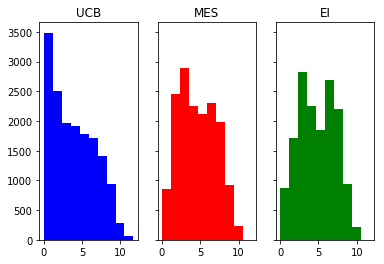

In [120]:
#make the histograms
fig, axes = plt.subplots(1, 3, sharey = True)

axes[0].hist(mean_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'b')
axes[0].set_title("UCB")
axes[1].hist(mes_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'r')
axes[1].set_title("MES")
axes[2].hist(ei_sdata['Distance'].values,bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'g')
axes[2].set_title("EI")
plt.show()